In [1]:
import numpy as np
from lsst.daf.butler import Butler

In [2]:
anonymize = True
butler_repo = 'dp02'

In [3]:
butler = Butler(butler_repo)

lines = butler.registry.queryCollections('*u/*')
lines.sort()
print(len(lines))

2840


In [4]:
lines = np.array(lines)
# remove mobu test runs (https://github.com/lsst-sqre/mobu/)
keep = [line.find('mobu') == -1 for line in lines]
lines = lines[keep]
len(lines)

981

In [5]:
# code to remove "parent" directories

delete = np.zeros(len(lines), dtype=bool)
for line in lines:
    for i,o in enumerate(lines):
        if o == line:
            continue
        if line.find(o) != -1:
            delete[i] = True

In [6]:
lines = lines[np.logical_not(delete)]

In [7]:
unames = []

for i,line in enumerate(lines):
    p = line.find('u/')
    #print(i)
    assert(p >= 0)
    lines[i] = line[(p+2):]
    #print(lines[i])
    tokens = lines[i].split('/')
    unames.append(tokens[0])

In [8]:
len(unames)

724

In [9]:
print('number of RSP dp02 Butler user collection = ', len(np.unique(unames)))

number of RSP dp02 Butler user collection =  67


In [10]:
unames = np.array(unames)
print('number of unique non-bot RSP users with a dp02 Butler user collection = ', len(np.unique(unames)))

number of unique non-bot RSP users with a dp02 Butler user collection =  67


In [11]:
if not anonymize:
    print(np.unique(unames))

<Axes: ylabel='collections per user'>

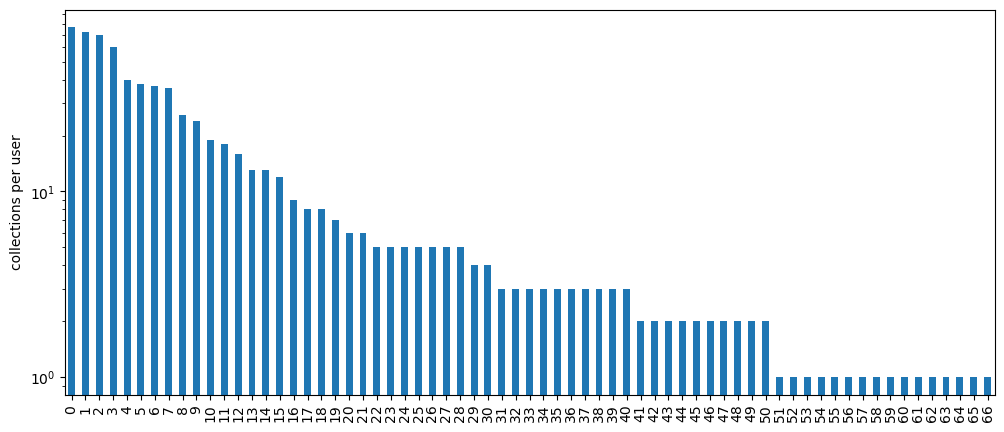

In [12]:
# make a histogram of these usernames ?

import pandas
from collections import Counter

uname_counts = Counter(unames)
df = pandas.DataFrame.from_dict(uname_counts, orient='index', columns=['ncoll'])
df.sort_values(by='ncoll', ascending=False, inplace=True)
df
df.plot(kind='bar', use_index=(not anonymize), legend=False, figsize=(12, 5), logy=True, xlabel='user name', ylabel='collections per user')

In [13]:
len(lines)

724